In [3]:

# one block for all the imports
import numpy as np
import matplotlib.pyplot as plt
from shapes import *
from PIL import Image
import matplotlib.cm as cm
import h5py

import matplotlib.pyplot as plt
#%matplotlib inline


import skimage.color as color
import torch
import numpy as np
import h5py
import tifffile
from scipy.ndimage.filters import median_filter
from skimage.filters import threshold_otsu
from collections import Counter
import imageio
import numpy as np
from skimage import img_as_ubyte

# Create the dataset and save those files in the training_images directory as hdf5 files

In [8]:
path_paste=r"shapes/coords" ## path to coords file which is generated using generate N points shape function

In [53]:
cd ..

/DATA3/mahadev/structured_code_to_hpc


In [9]:
dir_list=os.listdir(path_paste) ## making a list of the names of the co-ords files.

In [10]:
len(dir_list)

1000

In [6]:
def statistics (image):
    image=image.reshape(64,64)
    #img = median_filter(image,size=(2,2))
    #this actually worked better to generate 0.5 images
    #earlier i had tried threshold above0             #without this, it didnt work
    #threshold_global_otsu = threshold_otsu(test1_final)## i'm not using otsu here
    plt.figure()
    plt.imshow(image.reshape(64,64),cmap='gray')
    threshold_global_otsu=0
    segmented_image=image
    #segmented_image = (image> threshold_global_otsu).astype(np.int8)## earlier it was greater than and equals symbol, making it strictly           greater than worked too good
        #plt.imshow(segmented_image)
    #plt.figure()
    #plt.imshow(segmented_image.reshape(64,64))
    white_pixels=np.sum(segmented_image==1)
    black_pixels=np.sum(segmented_image==0)
    porousity=black_pixels/(white_pixels+black_pixels)
    return porousity


In [3]:
dir_list=os.listdir(path_paste)
print(len(dir_list))

8900


In [7]:
def save_images(dir):
    path_paste='shapes/coords'
    path=path_paste
    dir_list=os.listdir(path_paste)
    
    target_direc = "training_images_0255_1_decmial_class_imbalance_problem_with_m=1/image"
    for index in range(len(dir_list)):
        
        
        path_final=os.path.join(path, dir_list[index])
        coord=np.loadtxt(path_final)
        x,y=coord.T
        #area=trapz(x,y,dx=10)## area is coming out to be 1 in all these figures
        #print(area)
        #plt.subplot(numrows+1,im_per_row,index+1)
        ##########################################################################
        import matplotlib as mpl
        mpl.rcParams['axes.linewidth']=0.000005 ## conditioning the line width to be of size 0.0005 so that it don't generated black pixels

        np.random.seed(85)
        #shape = generate_Npoint_shape_plot()
        #mat=shape['coords'][2]
        #x=mat[0,:]
        #y=mat[1,:]



        print(np.max(np.abs(x)),np.max(np.abs(y)),index)## to check whether it crosses 0.5 (though it never)
        x_minimum,x_maximum=-.5,.5
        y_minimum,y_maximum=-.5,.5
        fig=plt.figure(figsize=(1,1),dpi=64,edgecolor='black')
        ax=fig.gca()
        ax.axis('equal')
        ax.set_xlim(x_minimum, x_maximum)
        ax.set_ylim(y_minimum, y_maximum)
        ax.set_position([0,0,1,1]) ## critical step for not to generated white space around the image and fit the axis in position and 0,0 is good against -0.5,-.5

        #ax.get_frame().set_linewidth(0.1)
        #ax.axis('equal')
        ax.tick_params(left=False,bottom=False)
        ax.tick_params(bottom=False, top=False, left=False, right=False)
        #ax.plot(x,y,color='black',linewidth=0.05)
        #plt.grid()
        print(np.trapz(x,y))
        #plt.figure()
        
        ax.fill(x,y,color='black')
        
        plt.xticks([])
        plt.yticks([])
        #plt.savefig('final_Check.png')
        fig.canvas.draw()

        data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)## generates data in array format and unsigned integer format
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        #fig2=plt.figure()
        image_to_filter=data[:,:,0] ## all 3 channels are exactly same, so take one channel data and do the image processing
        image_to_filter = image_to_filter.astype(np.uint8)## unsigned integer format to fit to 0,255
        #plt.imshow(data)
        #print(data.shape)
        test1_final=image_to_filter
        #filter_generated_
        test1_final = median_filter(image_to_filter,size=(2,2))## this actually worked better to generate 0.5 images, earlier i had tried threshold above 0 without this, it didnt work
        #threshold_global_otsu = threshold_otsu(image_to_filter)## i'm not using otsu here
        threshold_global_otsu=0
        segmented_image = (test1_final> threshold_global_otsu).astype(np.int8)## earlier it was greater than and equals symbol, making it strictly greater than worked too good
        #print(np.unique(segmented_image))
        #image=image.reshape(64,64)
        #img = median_filter(image,size=(2,2))
        #this actually worked better to generate 0.5 images
        #earlier i had tried threshold above0             #without this, it didnt work
        #threshold_global_otsu = threshold_otsu(test1_final)## i'm not using otsu here
        #plt.figure()
        #plt.imshow(image.reshape(64,64),cmap='gray')
#         threshold_global_otsu=0
#         segmented_image=image
#         segmented_image = (image> threshold_global_otsu).astype(np.int8)## earlier it was greater than and equals symbol, making it strictly           greater than worked too good
            #plt.imshow(segmented_image)
        #plt.figure()
        #plt.imshow(segmented_image.reshape(64,64))
        white_pixels=np.sum(segmented_image==1)
        black_pixels=np.sum(segmented_image==0)
        porousity=black_pixels/(white_pixels+black_pixels)
        print(porousity)
        
        
        #print ('the ratio is ',(black_pixels/(black_pixels+white_pixels)))
        ## try once without using median filter ##
        
       #################################################################################
        f = h5py.File(target_direc+str(index)+".hdf5", "w")
        f.create_dataset('data', data=image_to_filter, dtype="i8", compression="gzip")
        #f.create_dataset('data', data=segmented_image)
        f.close()
        
        
        #Image.fromarray(image_to_filter).resize(size, Image.ANTIALIAS).save('img.png')
        #Image.fromarray(image_to_filter).save('img.png')
        #image_resize = image.resize(size, Image.ANTIALIAS)
        #img=img_pil.resize((128,128),Image.ANTIALIAS)
        #Image.fromarray(img).save('img.png')
                                
        
        #plt.savefig('filename_segmented_please show up in pixels 1 or 0'+str(index)+'.png')
      
        #plt.savefig('C:\\Users\\madan\\OneDrive - IIT Delhi\\Desktop\\M.Tech project _second _phse\\M.Tech _second_phase project original code\\shapes\\image'+str(index)+
                    #'.png',dpi=32)
        #plt.axis('off')
        
    print(index)
        
    

In [6]:
!mkdir training_images_0255_1_decmial_class_imbalance_problem_with_m=1

In [10]:
chk=os.listdir('training_images_0255_1_decmial_class_imbalance_problem_with_m=1')
len(chk)

1000

0.39109001640459284 0.44735884825000277 0
0.5000000000000001
0.468017578125
0.4597321640673484 0.40125329431774165 1
0.49999999999999994
0.467041015625
0.42915206655503096 0.41473505689233514 2
0.5
0.46728515625
0.4679917941335808 0.4091837525513987 3
0.5
0.4677734375
0.43526707464777836 0.46146768116094466 4
0.5000000000000001
0.4677734375
0.3467810275609022 0.4981211772304103 5
0.5000000000000002
0.46533203125
0.3916382710828408 0.4798901491436864 6
0.5
0.466796875
0.4341277128939736 0.3993709652545959 7
0.5
0.467529296875
0.35263095984603027 0.4859983264595376 8
0.5
0.4658203125
0.39741636199417335 0.4462862100811433 9
0.5000000000000001
0.468505859375
0.4142993807083019 0.4122685860077949 10
0.5000000000000002
0.4677734375
0.49732264010414196 0.43188783779828066 11
0.5000000000000002
0.46435546875
0.44746342820026547 0.47578405622730613 12
0.5
0.466064453125
0.4351043734405164 0.38911398358176824 13
0.5000000000000001
0.466552734375
0.4572516374443571 0.3770488168360882 14
0.5
0.46

/tmp/ipykernel_1376527/3534786900.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(1,1),dpi=64,edgecolor='black')


0.5
0.4677734375
0.45570321467663516 0.37247051330048814 26
0.4999999999999999
0.467041015625
0.4540331437697014 0.35547868051735965 27
0.5000000000000001
0.466552734375
0.3510249091786516 0.4836651390369173 28
0.4999999999999999
0.466796875
0.3655731965806349 0.48325816326989024 29
0.5
0.46630859375
0.48884357385904076 0.3663364544873043 30
0.5
0.46728515625
0.42967246220207184 0.45574027537734063 31
0.5000000000000001
0.467529296875
0.38365107932475273 0.45291763444144095 32
0.5000000000000001
0.46728515625
0.4258750900661859 0.4138995129608402 33
0.5000000000000001
0.469482421875
0.46329928541772347 0.3738544539354125 34
0.5
0.467041015625
0.35641513915789197 0.4866088836487772 35
0.5
0.466552734375
0.3864280721104056 0.49076683902544505 36
0.5000000000000001
0.466552734375
0.44100026933935976 0.3806671166028621 37
0.5000000000000001
0.467041015625
0.46492862012597036 0.37767834656754523 38
0.5
0.467041015625
0.4723867432474085 0.35811340170558437 39
0.5
0.46875
0.381439567947026 0.

0.5000000000000002
0.466796875
0.43405450888589725 0.3977998809534398 147
0.5
0.468994140625
0.45421510428976947 0.3991797478872148 148
0.5
0.467041015625
0.40415068964156303 0.42385460576968925 149
0.5000000000000001
0.466796875
0.4562392910133422 0.3716076791328474 150
0.5
0.46875
0.424048786652722 0.4113951952164506 151
0.5000000000000001
0.46728515625
0.4905096156563613 0.3850407993832802 152
0.5000000000000002
0.4677734375
0.4298158189837308 0.3891067525177752 153
0.5000000000000002
0.4658203125
0.43014758702461076 0.4427922105809871 154
0.5
0.46728515625
0.4415710976122646 0.37391283314429064 155
0.5
0.4677734375
0.43821721691939597 0.39288254974072506 156
0.5000000000000001
0.46728515625
0.4618070440764256 0.38510132454251905 157
0.5000000000000002
0.466796875
0.4120269589833975 0.46174551355529736 158
0.5000000000000001
0.468994140625
0.3818223324351604 0.4675164399378461 159
0.5000000000000001
0.467529296875
0.357176515626982 0.4984294457405201 160
0.5
0.465087890625
0.4499507

0.5000000000000001
0.467041015625
0.3764480962688167 0.44394052609405704 269
0.5
0.46826171875
0.4325779607698106 0.49726340082446413 270
0.5000000000000001
0.467041015625
0.4372582519622092 0.4755067151661217 271
0.5000000000000001
0.4638671875
0.4429676447943476 0.40069632824564 272
0.5000000000000001
0.468017578125
0.4206702919729598 0.44899487522634707 273
0.5
0.46826171875
0.42143825590044154 0.4368557488838402 274
0.5000000000000001
0.4658203125
0.4951396209110951 0.38106377868836105 275
0.5000000000000001
0.468017578125
0.39226072681522367 0.4452801184550855 276
0.5
0.46728515625
0.45743108116516756 0.37734829326603087 277
0.5
0.46875
0.43232735356033203 0.38331319506319106 278
0.5000000000000001
0.467529296875
0.3831688005615803 0.4709216485984977 279
0.5000000000000001
0.46533203125
0.4961508343476556 0.35049449141032063 280
0.5
0.4677734375
0.3698095765154272 0.4795461243051598 281
0.49999999999999983
0.466552734375
0.3616206997144941 0.4649407861194582 282
0.5000000000000001

0.5
0.467529296875
0.45381271515747434 0.42033584942921876 389
0.5000000000000001
0.466064453125
0.37672305208475426 0.458095857380291 390
0.5
0.468505859375
0.3871901720402746 0.4460268269114024 391
0.5
0.466796875
0.3601232820948566 0.4816828135205896 392
0.5
0.46728515625
0.4872557023149648 0.3670629817841504 393
0.5
0.46728515625
0.474015875445164 0.369885376396152 394
0.49999999999999994
0.468505859375
0.41402310910572915 0.42965544748316514 395
0.5
0.46826171875
0.38000133965615085 0.45018599373502405 396
0.5000000000000002
0.4677734375
0.39161258444746616 0.42525819058539216 397
0.5
0.468505859375
0.4986289414147125 0.3540800917057444 398
0.5
0.466064453125
0.4305416354744833 0.38850011903017495 399
0.4999999999999999
0.466552734375
0.41782208282293054 0.48880648187442133 400
0.5
0.465576171875
0.4340202097250965 0.45720145727837475 401
0.5000000000000002
0.46728515625
0.44184403312517995 0.3827986740508212 402
0.5000000000000001
0.467529296875
0.3988056846906602 0.4180621656663

0.4677734375
0.42822487158995504 0.40273809093505736 508
0.49999999999999994
0.46826171875
0.4930945721706564 0.3530064843982905 509
0.5000000000000001
0.46728515625
0.48139211400571263 0.36047490581021724 510
0.5000000000000001
0.466552734375
0.41277326322858565 0.39851788533517324 511
0.5000000000000001
0.46923828125
0.37366393959380095 0.44776152821822324 512
0.5
0.466796875
0.4231951114974905 0.3938071690969745 513
0.49999999999999994
0.46826171875
0.41265162399479044 0.4373564998621299 514
0.49999999999999983
0.468017578125
0.37181646440015825 0.4490934499994683 515
0.5000000000000001
0.466552734375
0.4730055836794428 0.3751982213810007 516
0.5
0.466552734375
0.44246952983692656 0.397859062153943 517
0.5000000000000001
0.4677734375
0.44171260516091365 0.4148652942016912 518
0.5
0.466796875
0.4751696477017799 0.4392198180200568 519
0.5
0.4658203125
0.49126635588424944 0.37716234785346336 520
0.5
0.467041015625
0.4501699683978865 0.36857440686199444 521
0.49999999999999983
0.4672851

0.5000000000000002
0.467529296875
0.4600471060128616 0.436843303264149 632
0.5
0.466796875
0.4669956794114027 0.3994504437113898 633
0.49999999999999994
0.46728515625
0.48160167533254594 0.36498512724157267 634
0.5000000000000001
0.467529296875
0.3425095754566079 0.47772632729213854 635
0.5000000000000001
0.4658203125
0.44211167215207275 0.40811837276352664 636
0.49999999999999994
0.467529296875
0.4346979878057054 0.3990488361160513 637
0.5
0.467041015625
0.38476386730662143 0.4875166499544748 638
0.5
0.4677734375
0.38401494353577487 0.4203772099323101 639
0.5000000000000001
0.4677734375
0.3853570512220499 0.44531446839725525 640
0.5000000000000001
0.46728515625
0.3990935765919799 0.4947270183639835 641
0.5000000000000002
0.467529296875
0.3973192750216751 0.44449924435305455 642
0.5000000000000002
0.468505859375
0.35759866570993837 0.45531195834615984 643
0.5
0.466796875
0.41544289241542565 0.402166637279003 644
0.4999999999999999
0.467041015625
0.4460397953360198 0.39802648042883093 6

0.5000000000000002
0.466064453125
0.44240698196931694 0.40823213614601417 758
0.5000000000000001
0.468017578125
0.4580946212585665 0.3697135398063257 759
0.5000000000000001
0.466796875
0.475381386135067 0.3740508310699998 760
0.5000000000000001
0.467041015625
0.4238538910414486 0.3928424989983925 761
0.5
0.468017578125
0.4788434211774731 0.4262806299411632 762
0.5
0.467529296875
0.40642704712627603 0.4649009151679395 763
0.5
0.466796875
0.49622515545065693 0.36411140555327 764
0.5000000000000002
0.4677734375
0.47188354093740886 0.38801548308281175 765
0.5
0.4658203125
0.45181817101575505 0.4533649358766193 766
0.5000000000000002
0.466552734375
0.39807770775925544 0.4223671877972866 767
0.49999999999999994
0.468017578125
0.4380489161876138 0.3681349302023439 768
0.5000000000000001
0.467529296875
0.45537532019640253 0.3719032681000423 769
0.5000000000000001
0.467529296875
0.4085459961931903 0.4898958851053902 770
0.4999999999999999
0.46728515625
0.3980502970643273 0.469759419730763 771
0

0.5
0.467529296875
0.46024199986738873 0.42527151221773657 877
0.5000000000000001
0.4677734375
0.43501329741297323 0.43587977801993083 878
0.5
0.4658203125
0.4212941480616471 0.39841893858225574 879
0.5000000000000001
0.466796875
0.40279508446562345 0.40721135007218445 880
0.5000000000000001
0.467529296875
0.49262566655399076 0.36427730076343184 881
0.49999999999999994
0.467041015625
0.4800565021648031 0.40900363965466047 882
0.5000000000000001
0.46630859375
0.3873338966307075 0.4459908314797064 883
0.5000000000000002
0.468017578125
0.42608560564034464 0.4000861000830028 884
0.4999999999999999
0.468017578125
0.4622116500711334 0.3787146964956453 885
0.5
0.468505859375
0.3825841895987008 0.4381846265999946 886
0.49999999999999994
0.467529296875
0.46537582092514473 0.4684194663438007 887
0.5000000000000001
0.465576171875
0.3943873681224051 0.46701507443621737 888
0.5
0.466796875
0.4195945207752323 0.42630736029899724 889
0.5000000000000001
0.468017578125
0.40647482843979227 0.46542018613

0.5
0.4677734375
0.41835553781977647 0.41247784326880754 999
0.5
0.468017578125
999


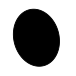

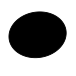

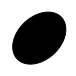

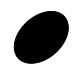

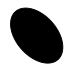

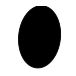

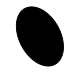

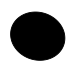

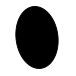

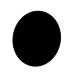

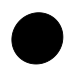

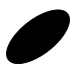

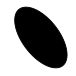

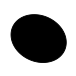

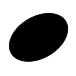

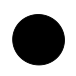

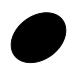

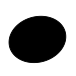

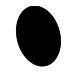

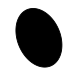

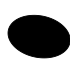

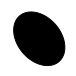

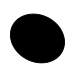

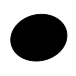

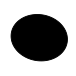

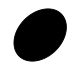

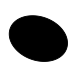

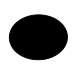

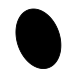

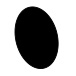

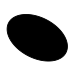

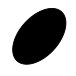

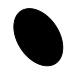

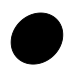

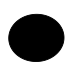

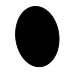

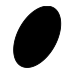

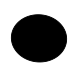

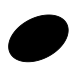

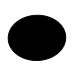

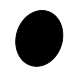

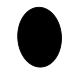

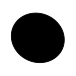

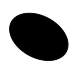

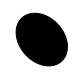

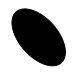

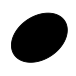

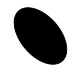

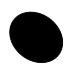

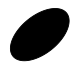

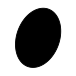

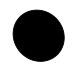

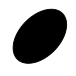

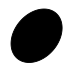

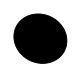

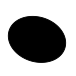

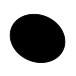

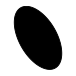

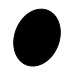

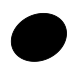

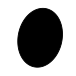

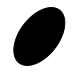

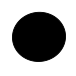

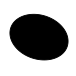

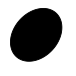

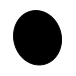

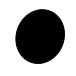

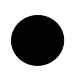

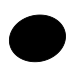

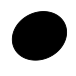

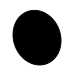

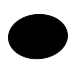

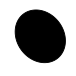

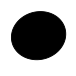

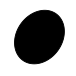

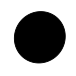

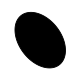

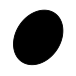

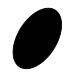

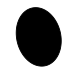

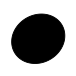

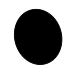

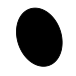

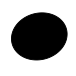

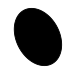

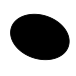

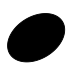

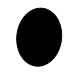

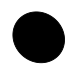

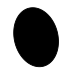

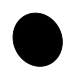

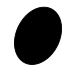

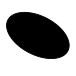

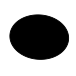

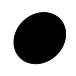

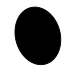

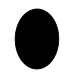

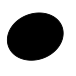

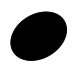

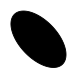

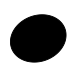

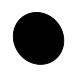

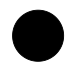

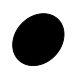

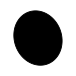

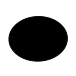

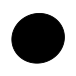

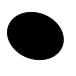

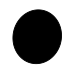

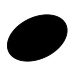

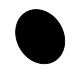

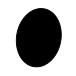

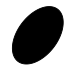

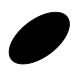

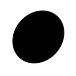

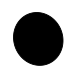

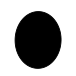

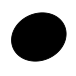

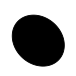

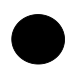

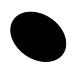

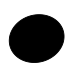

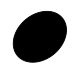

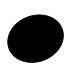

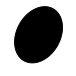

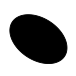

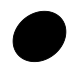

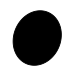

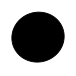

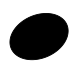

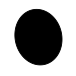

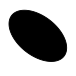

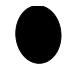

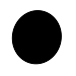

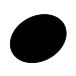

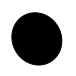

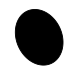

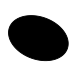

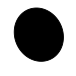

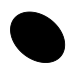

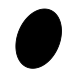

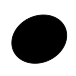

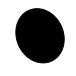

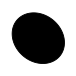

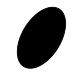

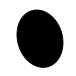

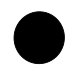

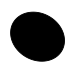

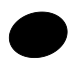

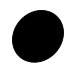

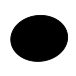

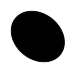

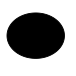

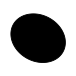

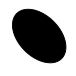

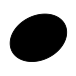

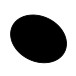

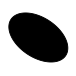

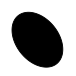

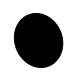

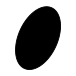

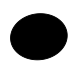

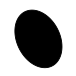

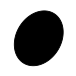

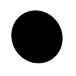

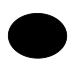

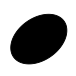

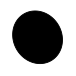

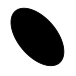

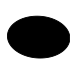

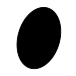

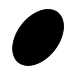

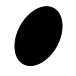

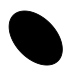

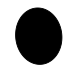

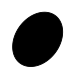

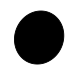

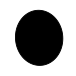

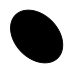

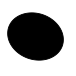

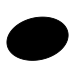

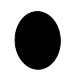

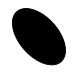

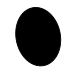

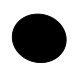

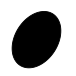

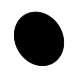

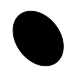

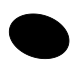

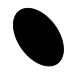

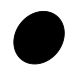

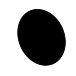

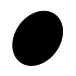

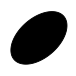

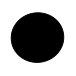

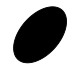

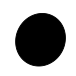

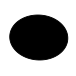

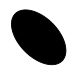

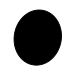

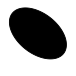

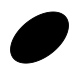

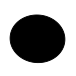

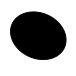

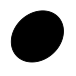

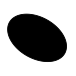

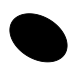

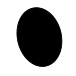

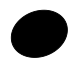

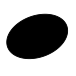

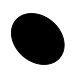

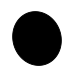

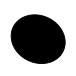

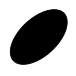

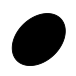

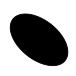

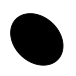

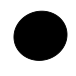

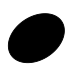

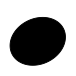

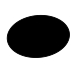

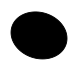

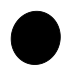

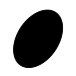

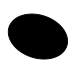

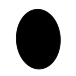

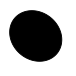

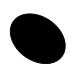

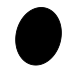

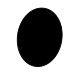

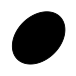

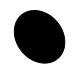

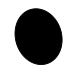

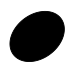

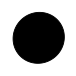

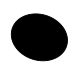

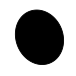

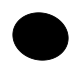

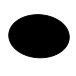

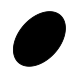

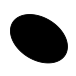

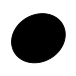

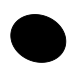

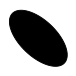

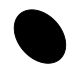

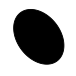

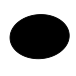

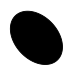

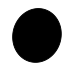

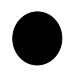

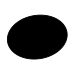

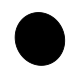

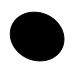

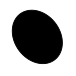

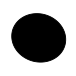

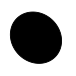

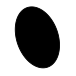

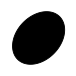

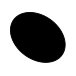

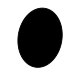

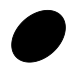

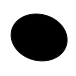

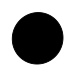

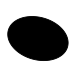

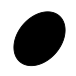

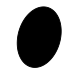

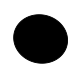

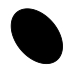

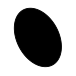

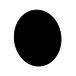

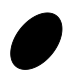

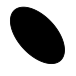

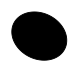

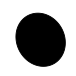

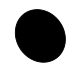

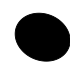

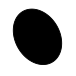

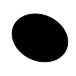

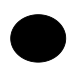

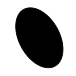

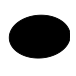

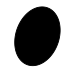

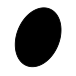

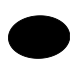

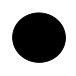

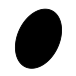

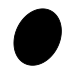

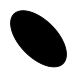

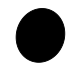

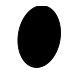

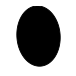

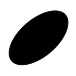

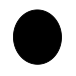

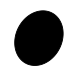

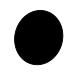

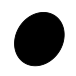

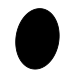

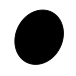

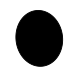

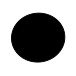

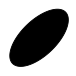

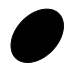

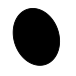

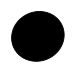

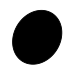

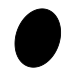

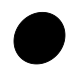

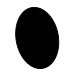

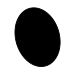

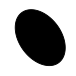

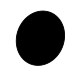

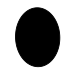

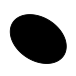

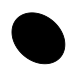

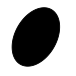

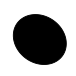

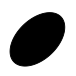

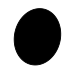

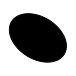

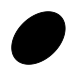

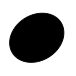

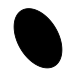

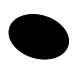

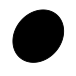

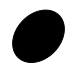

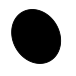

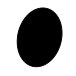

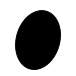

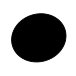

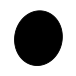

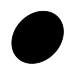

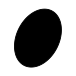

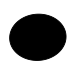

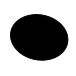

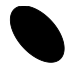

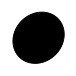

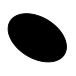

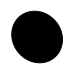

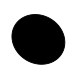

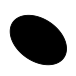

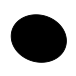

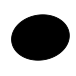

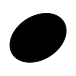

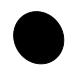

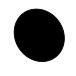

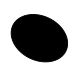

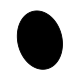

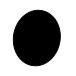

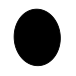

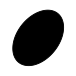

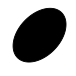

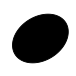

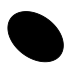

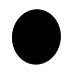

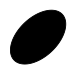

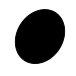

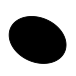

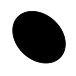

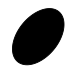

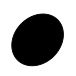

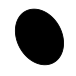

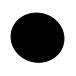

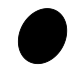

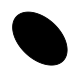

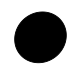

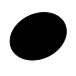

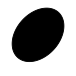

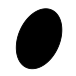

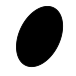

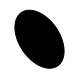

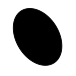

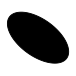

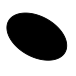

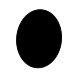

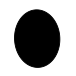

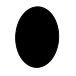

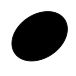

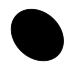

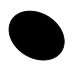

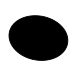

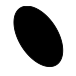

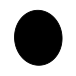

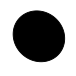

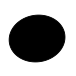

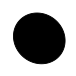

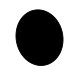

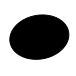

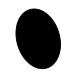

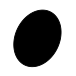

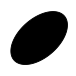

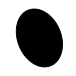

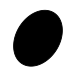

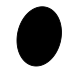

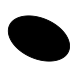

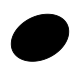

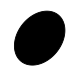

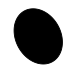

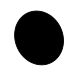

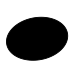

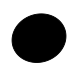

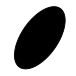

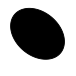

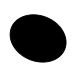

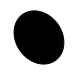

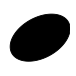

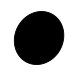

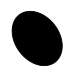

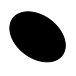

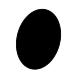

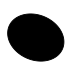

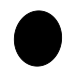

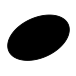

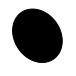

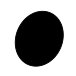

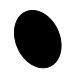

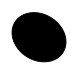

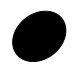

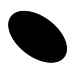

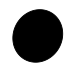

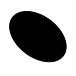

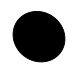

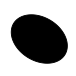

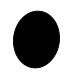

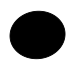

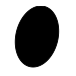

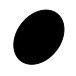

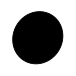

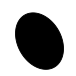

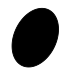

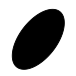

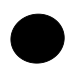

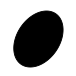

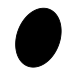

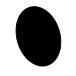

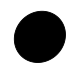

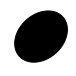

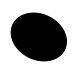

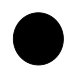

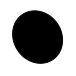

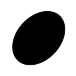

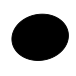

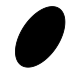

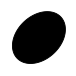

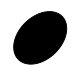

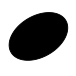

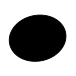

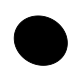

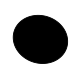

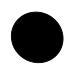

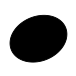

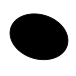

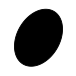

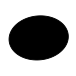

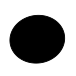

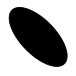

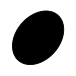

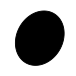

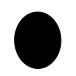

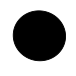

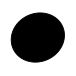

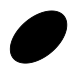

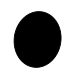

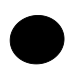

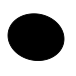

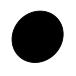

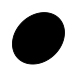

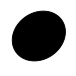

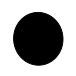

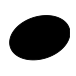

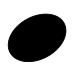

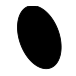

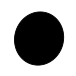

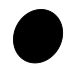

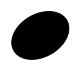

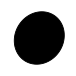

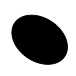

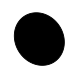

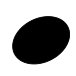

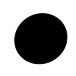

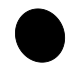

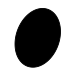

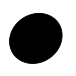

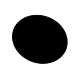

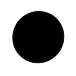

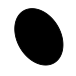

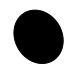

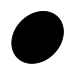

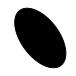

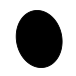

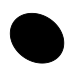

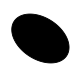

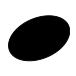

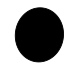

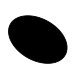

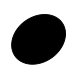

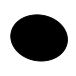

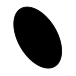

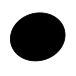

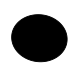

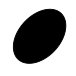

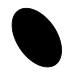

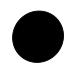

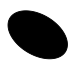

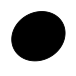

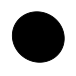

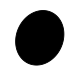

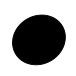

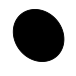

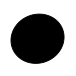

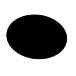

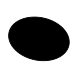

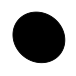

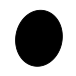

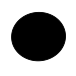

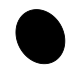

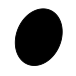

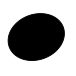

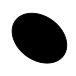

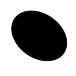

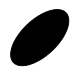

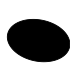

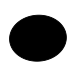

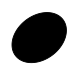

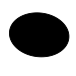

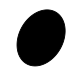

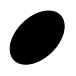

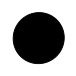

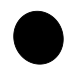

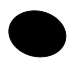

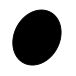

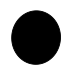

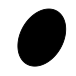

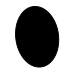

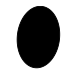

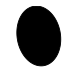

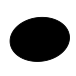

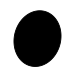

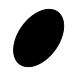

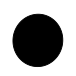

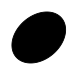

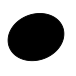

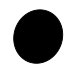

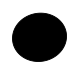

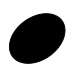

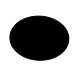

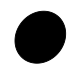

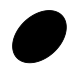

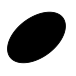

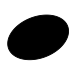

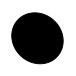

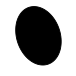

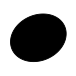

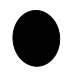

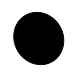

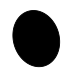

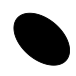

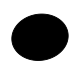

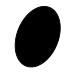

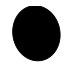

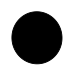

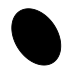

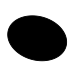

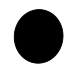

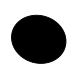

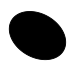

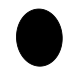

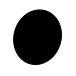

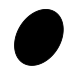

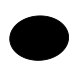

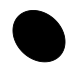

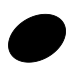

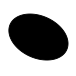

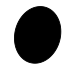

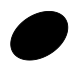

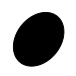

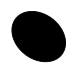

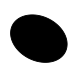

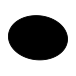

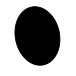

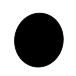

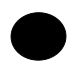

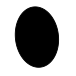

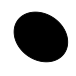

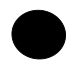

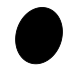

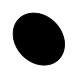

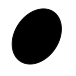

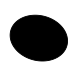

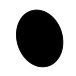

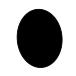

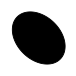

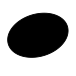

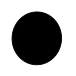

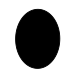

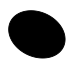

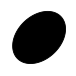

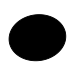

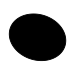

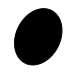

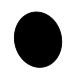

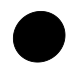

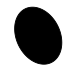

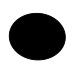

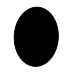

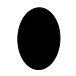

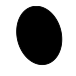

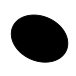

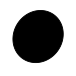

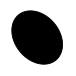

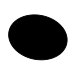

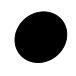

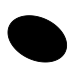

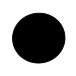

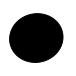

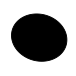

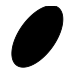

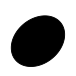

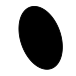

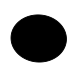

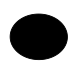

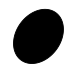

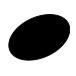

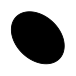

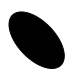

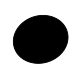

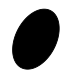

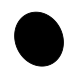

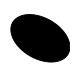

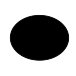

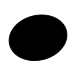

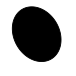

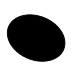

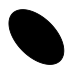

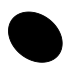

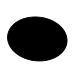

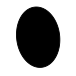

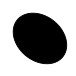

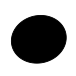

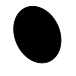

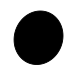

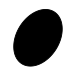

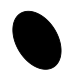

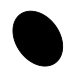

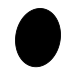

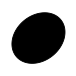

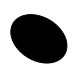

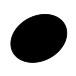

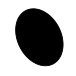

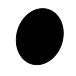

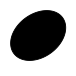

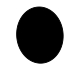

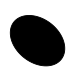

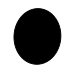

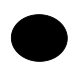

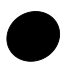

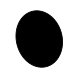

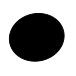

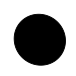

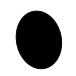

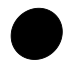

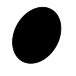

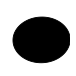

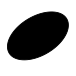

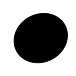

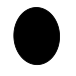

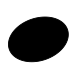

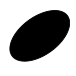

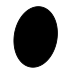

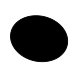

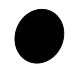

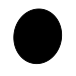

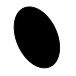

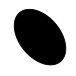

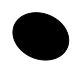

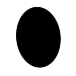

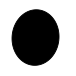

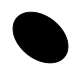

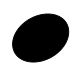

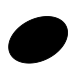

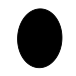

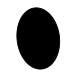

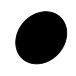

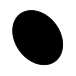

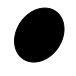

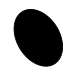

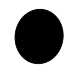

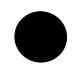

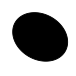

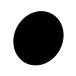

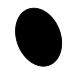

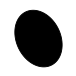

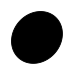

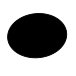

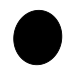

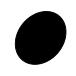

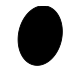

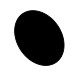

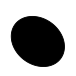

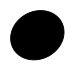

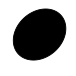

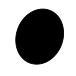

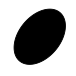

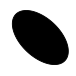

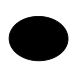

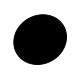

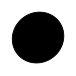

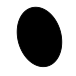

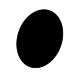

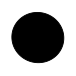

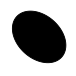

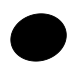

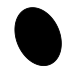

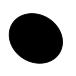

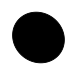

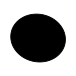

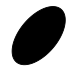

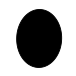

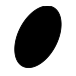

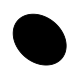

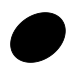

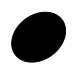

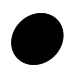

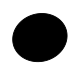

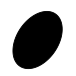

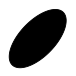

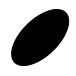

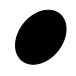

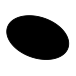

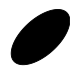

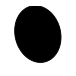

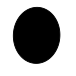

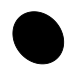

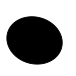

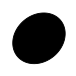

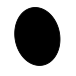

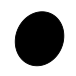

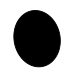

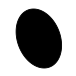

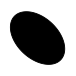

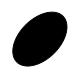

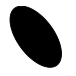

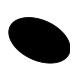

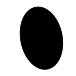

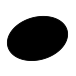

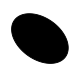

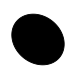

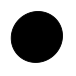

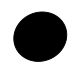

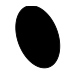

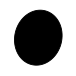

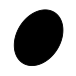

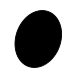

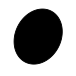

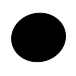

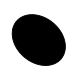

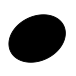

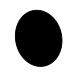

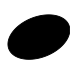

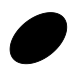

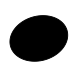

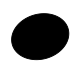

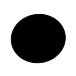

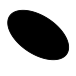

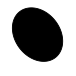

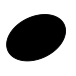

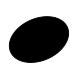

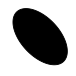

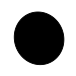

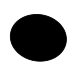

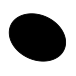

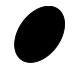

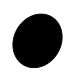

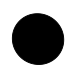

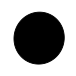

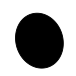

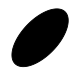

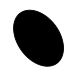

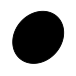

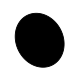

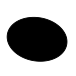

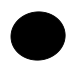

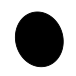

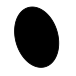

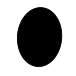

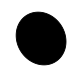

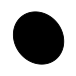

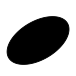

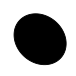

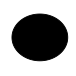

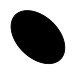

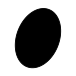

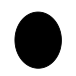

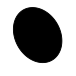

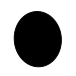

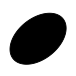

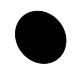

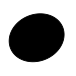

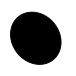

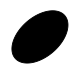

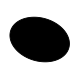

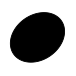

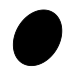

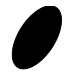

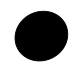

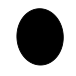

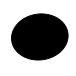

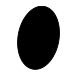

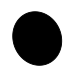

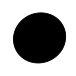

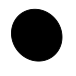

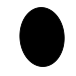

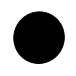

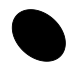

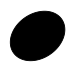

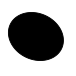

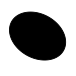

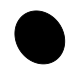

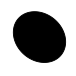

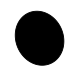

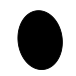

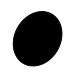

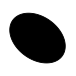

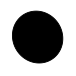

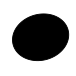

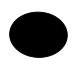

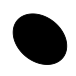

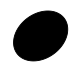

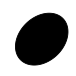

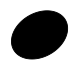

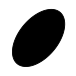

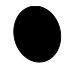

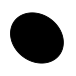

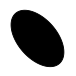

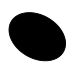

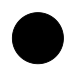

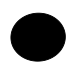

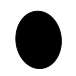

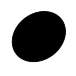

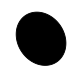

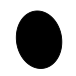

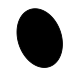

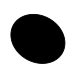

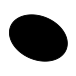

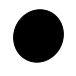

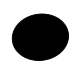

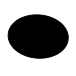

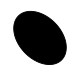

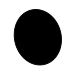

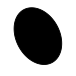

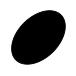

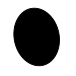

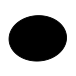

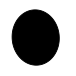

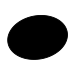

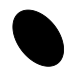

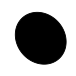

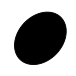

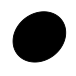

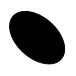

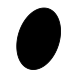

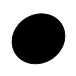

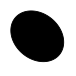

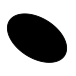

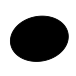

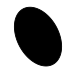

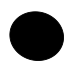

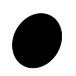

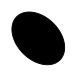

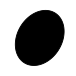

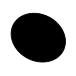

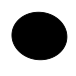

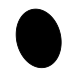

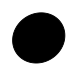

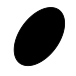

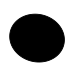

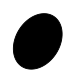

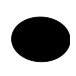

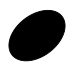

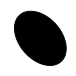

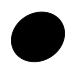

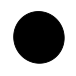

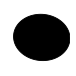

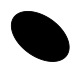

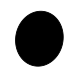

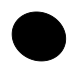

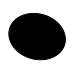

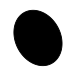

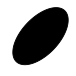

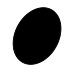

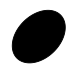

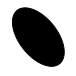

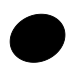

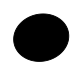

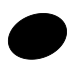

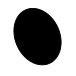

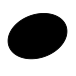

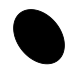

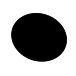

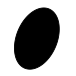

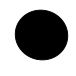

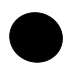

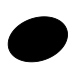

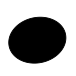

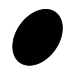

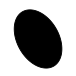

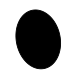

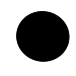

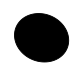

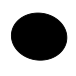

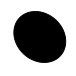

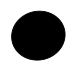

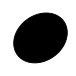

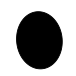

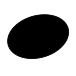

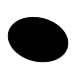

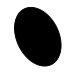

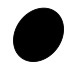

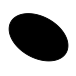

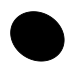

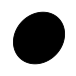

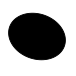

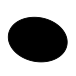

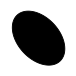

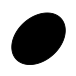

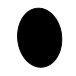

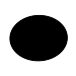

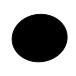

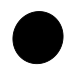

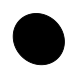

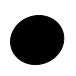

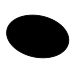

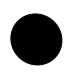

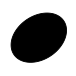

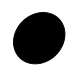

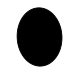

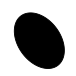

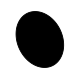

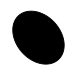

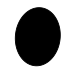

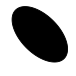

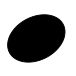

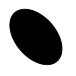

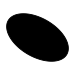

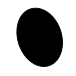

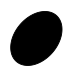

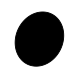

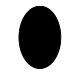

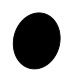

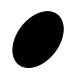

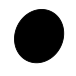

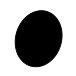

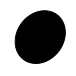

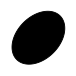

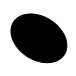

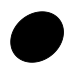

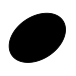

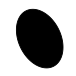

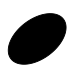

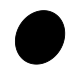

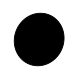

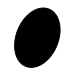

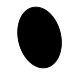

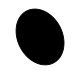

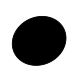

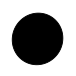

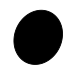

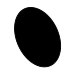

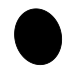

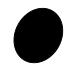

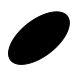

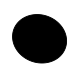

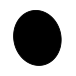

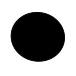

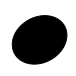

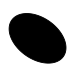

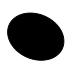

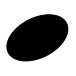

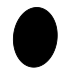

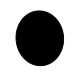

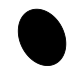

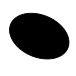

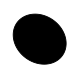

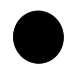

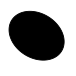

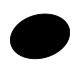

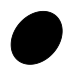

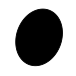

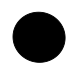

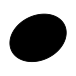

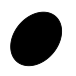

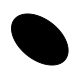

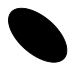

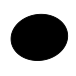

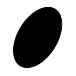

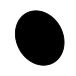

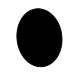

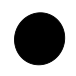

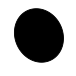

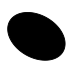

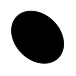

In [11]:
save_images(dir)

In [56]:
cd training_images_0255

/DATA3/mahadev/structured_code_to_hpc/training_images_0255


In [28]:
with h5py.File('training_images_for_more', "r") as f:
    img = f['data'][()]
    print(np.unique(img))
img = np.expand_dims(img, axis=0)
#img
#plt.imshow(img.reshape(128,128),cmap='gray')
torch_img = Tensor(img)
print(type(torch_img))
np.unique(torch_img)
torch_img_mystery = torch_img.div(255).sub(0.5).div(0.5)
print(type(torch_img_mystery))
torch_img_mystery

IsADirectoryError: [Errno 21] Unable to open file (file read failed: time = Mon Apr 24 11:03:50 2023
, filename = 'training_images_for_more', file descriptor = 57, errno = 21, error message = 'Is a directory', buf = 0x7ffdc864a6c8, total read size = 8, bytes this sub-read = 8, bytes actually read = 18446744073709551615, offset = 0)

In [49]:
cd training_images_for_more

/DATA3/mahadev/structured_code_to_hpc/training_images_for_more


In [57]:
ls

image0.hdf5     image2152.hdf5  image3304.hdf5  image4457.hdf5  image5609.hdf5
image1000.hdf5  image2153.hdf5  image3305.hdf5  image4458.hdf5  image560.hdf5
image1001.hdf5  image2154.hdf5  image3306.hdf5  image4459.hdf5  image5610.hdf5
image1002.hdf5  image2155.hdf5  image3307.hdf5  image445.hdf5   image5611.hdf5
image1003.hdf5  image2156.hdf5  image3308.hdf5  image4460.hdf5  image5612.hdf5
image1004.hdf5  image2157.hdf5  image3309.hdf5  image4461.hdf5  image5613.hdf5
image1005.hdf5  image2158.hdf5  image330.hdf5   image4462.hdf5  image5614.hdf5
image1006.hdf5  image2159.hdf5  image3310.hdf5  image4463.hdf5  image5615.hdf5
image1007.hdf5  image215.hdf5   image3311.hdf5  image4464.hdf5  image5616.hdf5
image1008.hdf5  image2160.hdf5  image3312.hdf5  image4465.hdf5  image5617.hdf5
image1009.hdf5  image2161.hdf5  image3313.hdf5  image4466.hdf5  image5618.hdf5
image100.hdf5   image2162.hdf5  image3314.hdf5  image4467.hdf5  image5619.hdf5
image1010.hdf5  image2163.hdf5  image3315.hdf5  image

[  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  23  24  26  27  28  29  30  31  33  36  41  42  43  44  47
  48  49  50  53  57  58  60  62  64  65  66  67  76  78  79  80  83  84
  87  89  93  98 103 111 113 116 117 118 122 123 124 125 128 130 132 133
 137 140 142 144 146 148 150 159 161 165 166 169 170 172 174 179 181 182
 184 186 189 191 193 194 196 198 200 202 204 205 207 209 212 216 219 220
 221 226 228 229 232 234 242 244 245 246 248 250 251 252 253 254 255]


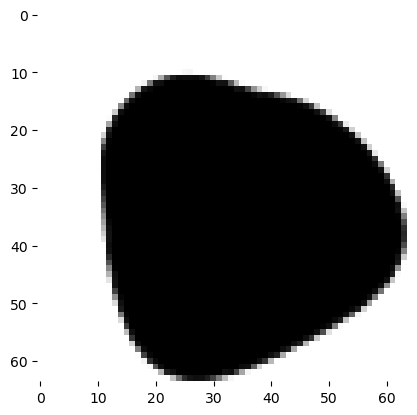

In [60]:
with h5py.File('image1007.hdf5', "r") as f:
    img = f['data'][()]
    print(np.unique(img))
    plt.imshow(img.reshape(64,64),cmap='gray')

    

def save_images(dir):
    dir_list=os.listdir(path_paste)
    path=path_paste
    target_direc = "training_images\image"
    for index in range(len(dir_list)):
        
        
        path_final=os.path.join(path, dir_list[index])
        coord=np.loadtxt(path_final)
        x,y=coord.T
        #area=trapz(x,y,dx=10)## area is coming out to be 1 in all these figures
        #print(area)
        #plt.subplot(numrows+1,im_per_row,index+1)
        ##########################################################################
        import matplotlib as mpl
        mpl.rcParams['axes.linewidth']=0.0005 ## conditioning the line width to be of size 0.0005 so that it don't generated black pixels

        np.random.seed(85)
        #shape = generate_Npoint_shape_plot()
        #mat=shape['coords'][2]
        #x=mat[0,:]
        #y=mat[1,:]



        print(np.max(np.abs(x)),np.max(np.abs(y)))## to check whether it crosses 0.5 (though it never)
        x_minimum,x_maximum=-.5,.5
        y_minimum,y_maximum=-.5,.5
        fig=plt.figure(figsize=(1,1),dpi=128,edgecolor='black')
        ax=fig.gca()
        ax.axis('equal')
        ax.set_xlim(x_minimum, x_maximum)
        ax.set_ylim(y_minimum, y_maximum)
        ax.set_position([0,0,1,1]) ## critical step for not to generated white space around the image and fit the axis in position and 0,0 is good against -0.5,-.5

        #ax.get_frame().set_linewidth(0.1)
        #ax.axis('equal')
        ax.tick_params(left=False,bottom=False)
        ax.tick_params(bottom=False, top=False, left=False, right=False)
        #ax.plot(x,y,color='black',linewidth=0.05)
        #plt.grid()

        ax.fill(x,y,color='black')
        #plt.xticks([])
        #plt.yticks([])
        #plt.savefig('final_Check.png')
        fig.canvas.draw()

        data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)## generates data in array format and unsigned integer format
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        fig2=plt.figure()
        image_to_filter=data[:,:,0] ## all 3 channels are exactly same, so take one channel data and do the image processing
        image_to_filter = image_to_filter.astype(np.uint8)## unsigned integer format to fit to 0,255
        plt.imshow(data)
        break
        #print(data.shape)
        #test1_final=image_to_filter
        
        test1_final = median_filter(image_to_filter,size=(2,2))## this actually worked better to generate 0.5 images, earlier i had tried threshold above 0 without this, it didnt work
        #threshold_global_otsu = threshold_otsu(test1_final)## i'm not using otsu here
        threshold_global_otsu=0
        segmented_image = (test1_final > threshold_global_otsu).astype(np.int8)## earlier it was greater than and equals symbol, making it strictly greater than worked too good
        
        #print ('the ratio is ',(black_pixels/(black_pixels+white_pixels)))
        ## try once without using median filter ##
        
       #################################################################################
        f = h5py.File(target_direc+str(index)+".hdf5", "w")
        f.create_dataset('data', data=segmented_image, dtype="i8", compression="gzip")
        f.close()
        
        
        #Image.fromarray(image_to_filter).resize(size, Image.ANTIALIAS).save('img.png')
        #Image.fromarray(image_to_filter).save('img.png')
        #image_resize = image.resize(size, Image.ANTIALIAS)
        #img=img_pil.resize((128,128),Image.ANTIALIAS)
        #Image.fromarray(img).save('img.png')
                                
        
        #plt.savefig('filename_segmented_please show up in pixels 1 or 0'+str(index)+'.png')
      
        #plt.savefig('C:\\Users\\madan\\OneDrive - IIT Delhi\\Desktop\\M.Tech project _second _phse\\M.Tech _second_phase project original code\\shapes\\image'+str(index)+
                    #'.png',dpi=32)
        #plt.axis('off')
        
    

In [ ]:
save_images(dir)

In [ ]:
images_list=os.listdir('training_images/')

In [ ]:
cd training_images

In [ ]:
len(images_list)

In [ ]:
images_old=os.listdir('training_images_old/')

In [ ]:
len(images_old)

In [ ]:
dir_list[3350:3357]